In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data from csv file
flp= pd.read_csv('loan_prediction.csv')
flp.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
502,LP002615,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban,Y
147,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y


###### Performing EDA

In [3]:
# checking shape of data
flp.shape

(614, 13)

In [4]:
# checking data type
flp.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#checking unique value in each row
flp.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
# checking null value
flp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

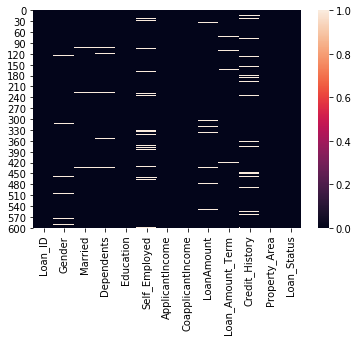

In [7]:
# heatmap of null value
sns.heatmap(flp.isnull())

In [8]:
# Imputing null values and removing unnecessary columns
flp=flp.drop(['Loan_ID'], axis=1)

for column in flp[['Gender','Married','Dependents','Self_Employed','Credit_History']]:
    flp[column].fillna(flp[column].mode()[0], inplace=True)

for column in flp[['LoanAmount','Loan_Amount_Term']]:
    flp[column].fillna(flp[column].mean(), inplace=True)

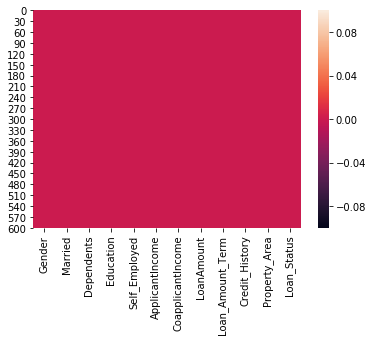

In [9]:
# heatmap of null value
sns.heatmap(flp.isnull())

In [10]:
# checking the data description
flp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
# corelation between coloums
flp.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


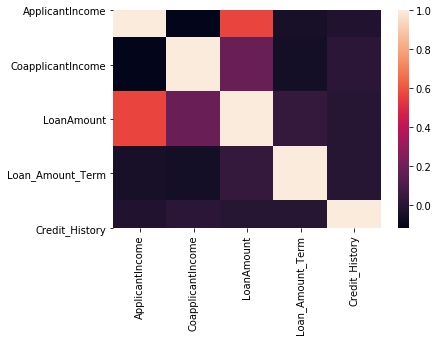

In [12]:
# heat map of corelation
sns.heatmap(flp.corr())

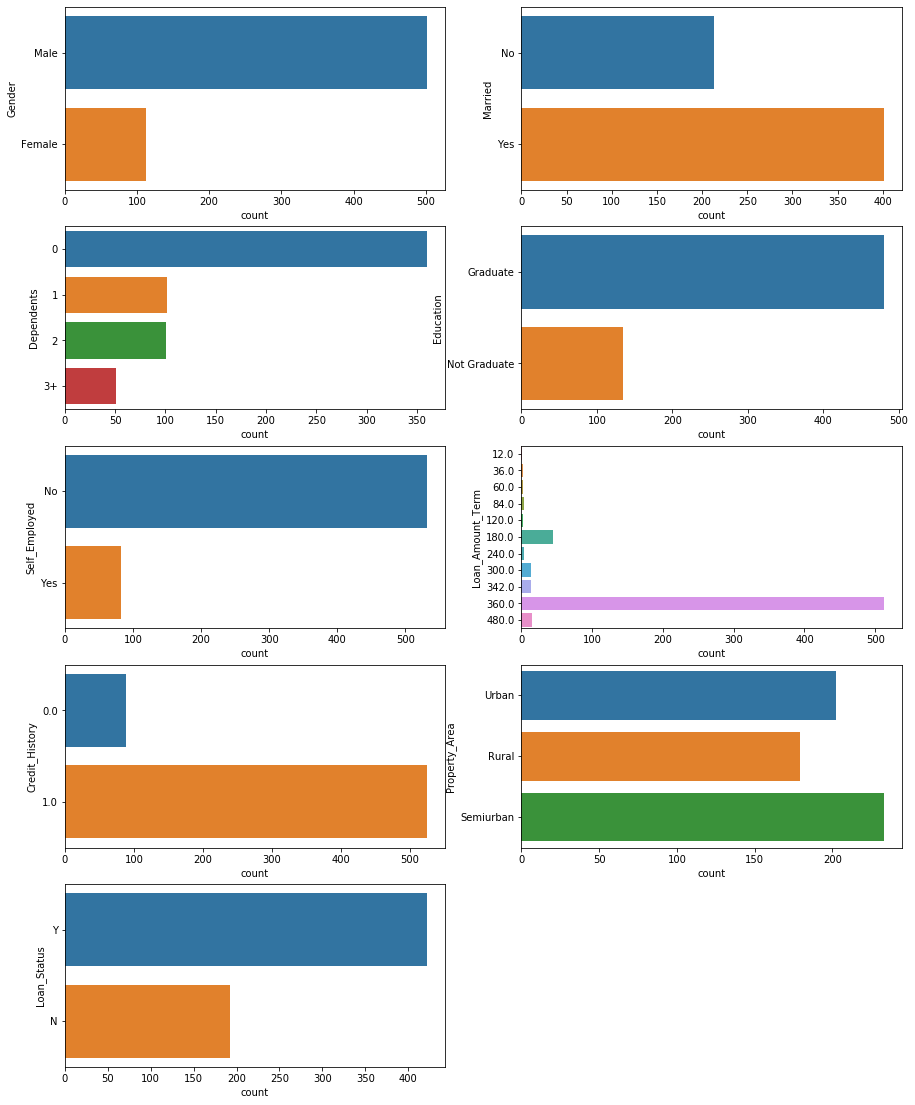

In [13]:
#creating barplot of colums to check the count of indivisual value
Index=flp[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(15,80))
for column_index,col in enumerate(Index.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(y=Index[col],data=Index)

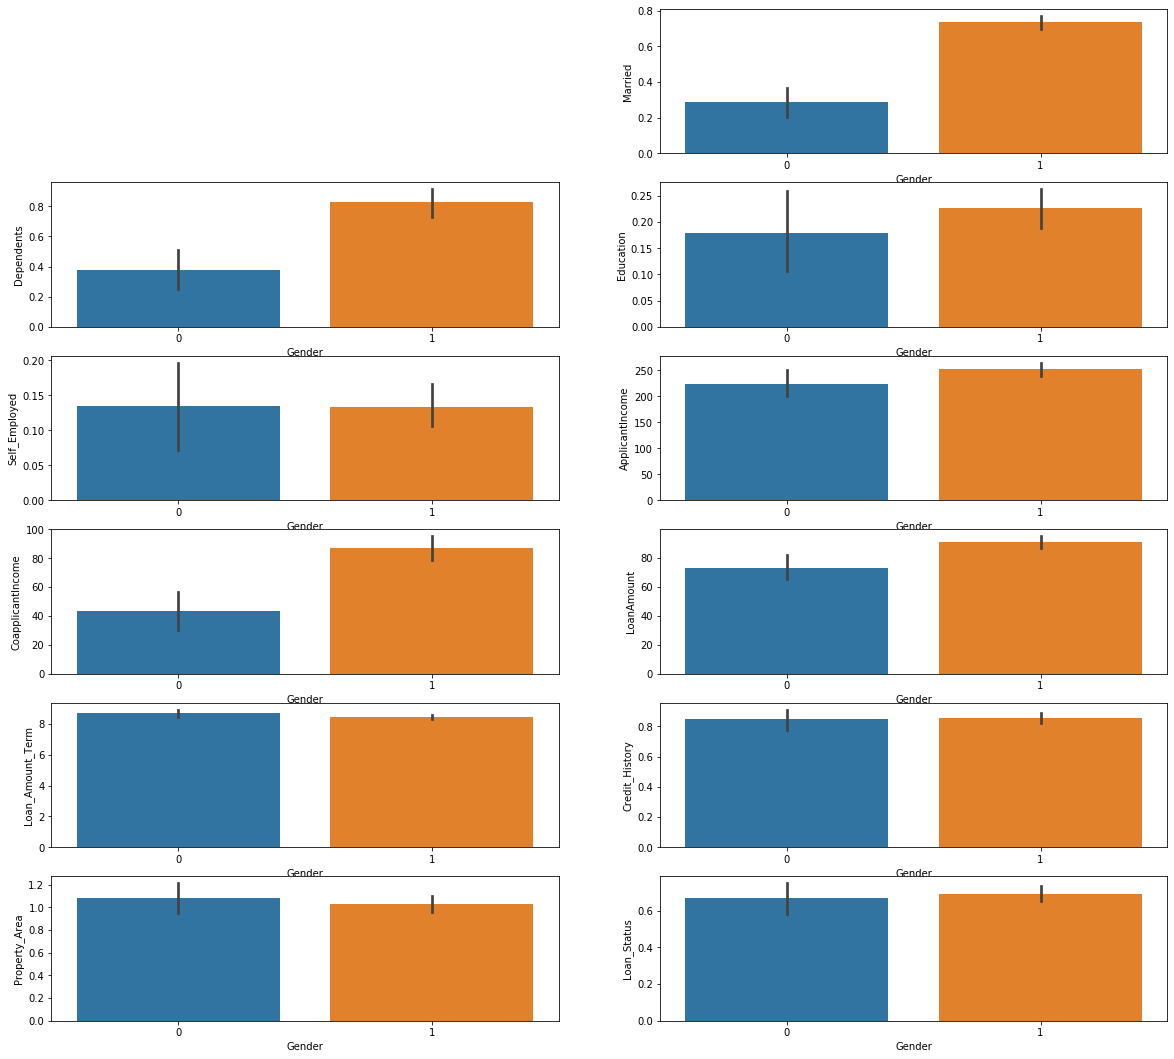

In [14]:
# creating bar plot of colums with respect to Gender to check distribution among Gender
flp1=flp
flp1=flp1.apply(LabelEncoder().fit_transform).astype(int)
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Gender':
        continue
    plt.subplot(8, 2, column_index+1)
    
    sns.barplot(x='Gender', y=column, data=flp1)

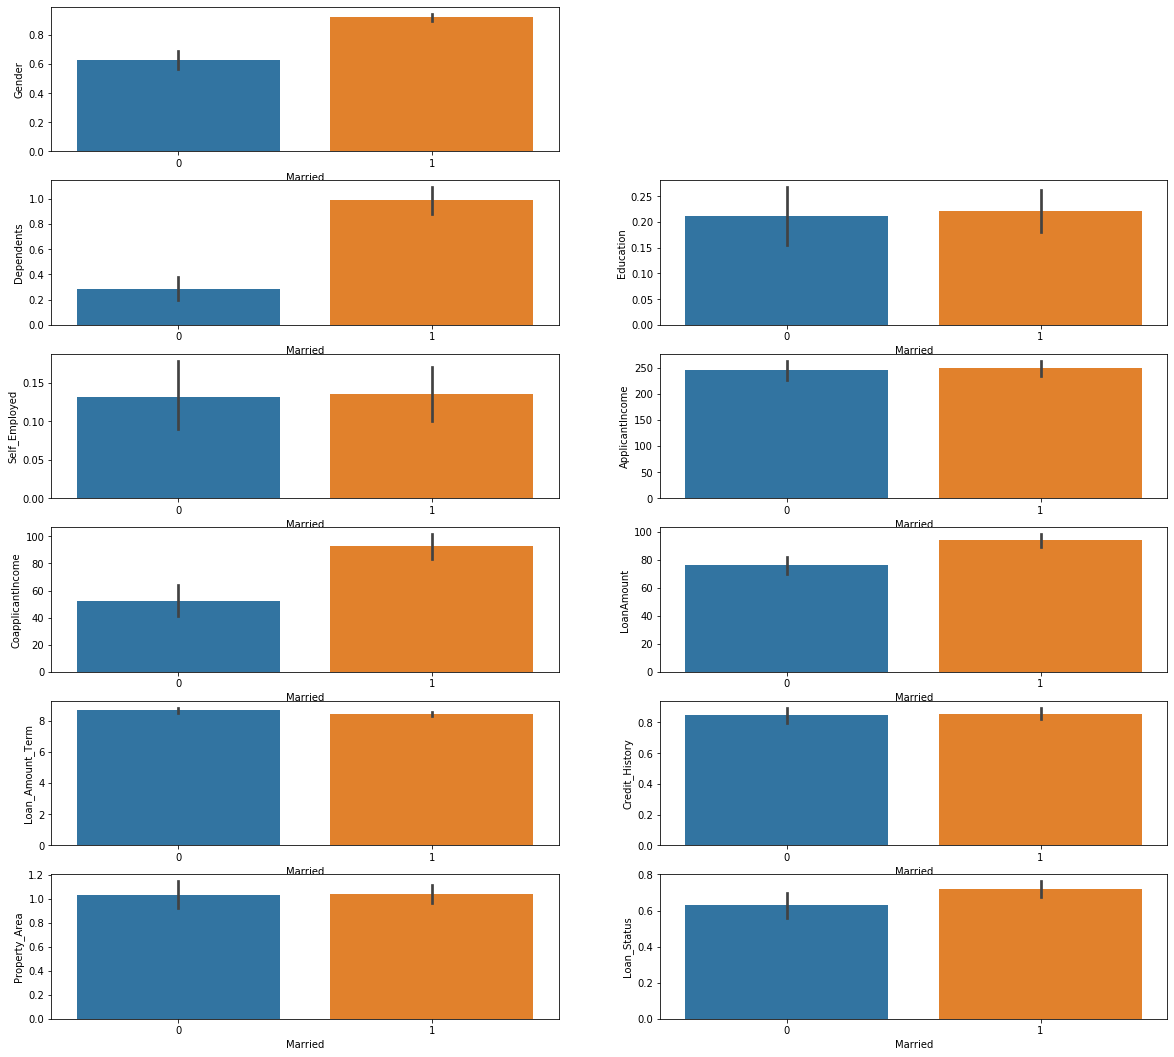

In [15]:
# creating bar plot of colums with respect to Married to check distribution among Married
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Married':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Married', y=column, data=flp1)

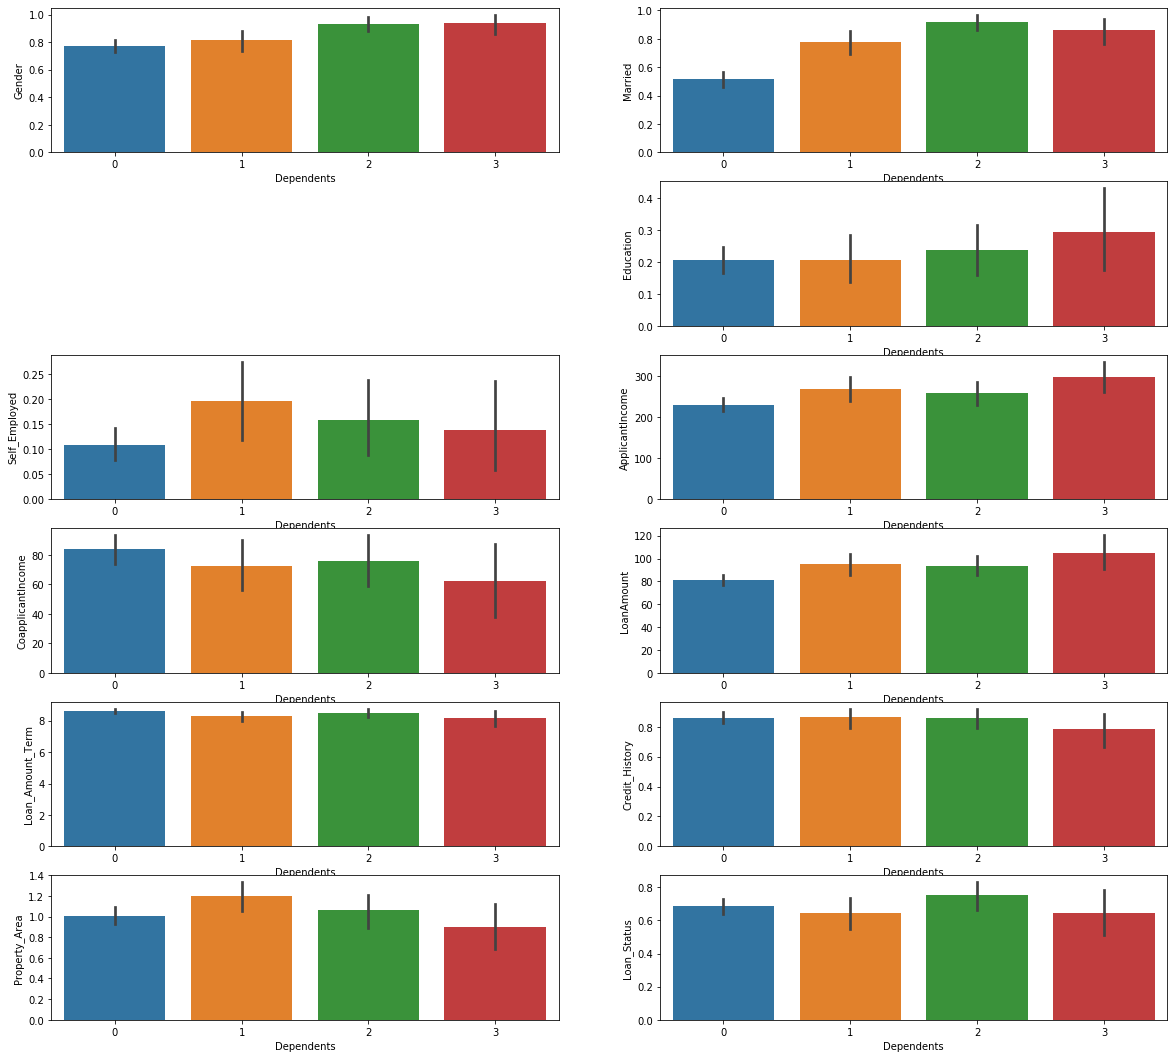

In [16]:
# creating bar plot of colums with respect to Dependents to check distribution among Dependents
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Dependents':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Dependents', y=column, data=flp1)

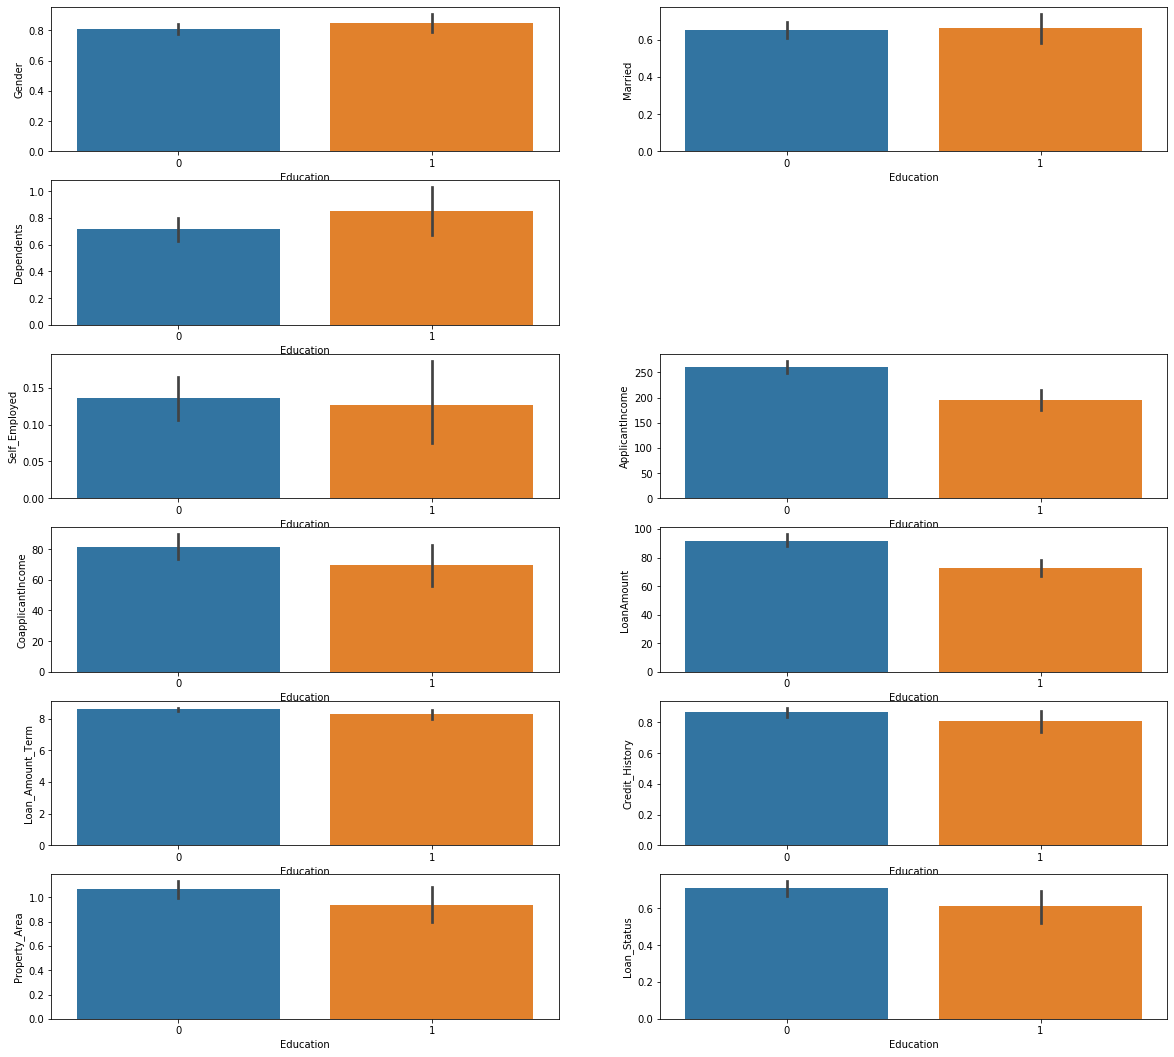

In [17]:
# creating bar plot of colums with respect to Education to check distribution among Education
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Education':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Education', y=column, data=flp1)

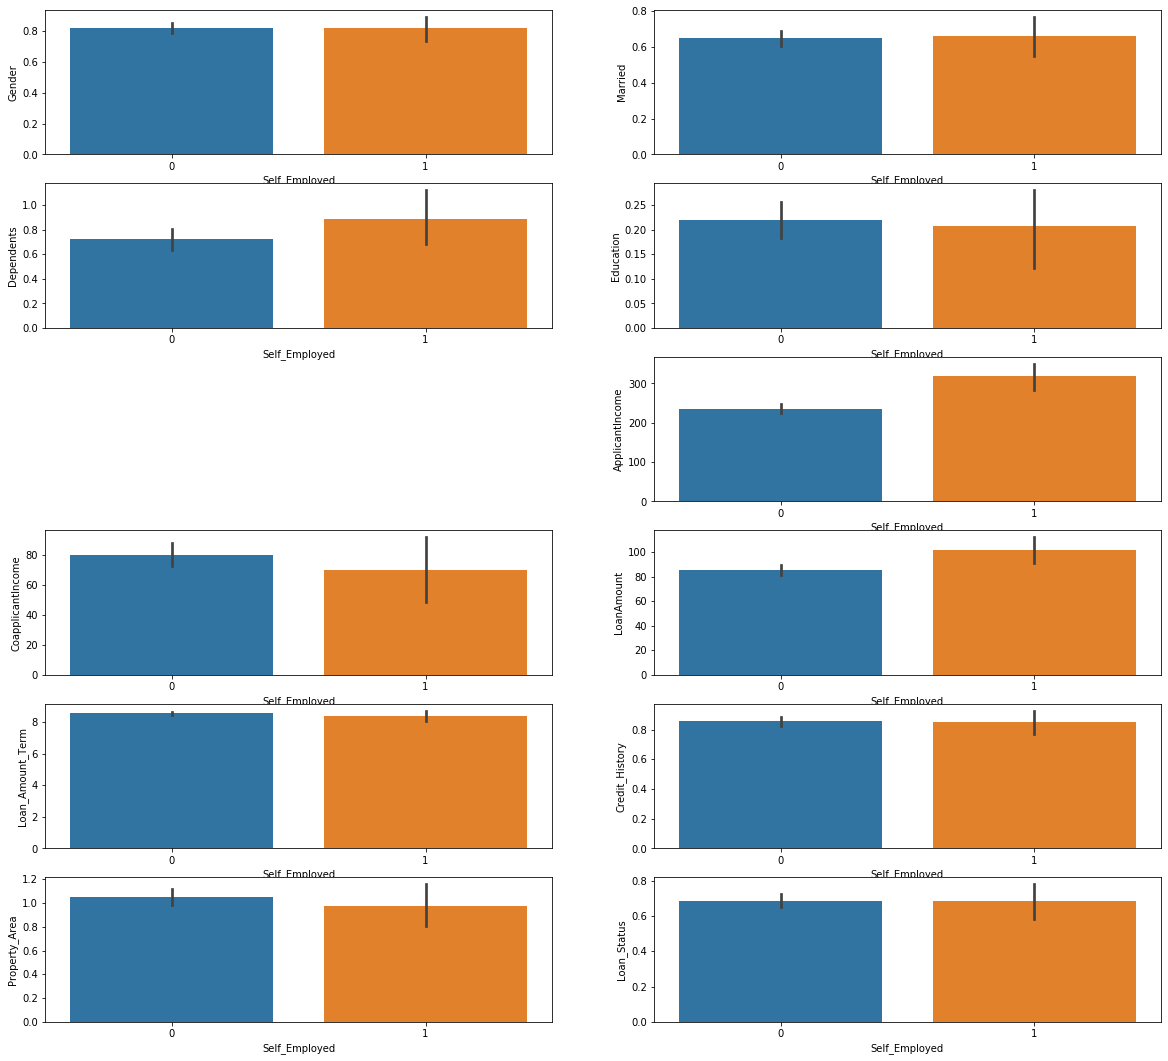

In [18]:
# creating bar plot of colums with respect to Self_Employed to check distribution among Self_Employed
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Self_Employed':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Self_Employed', y=column, data=flp1)

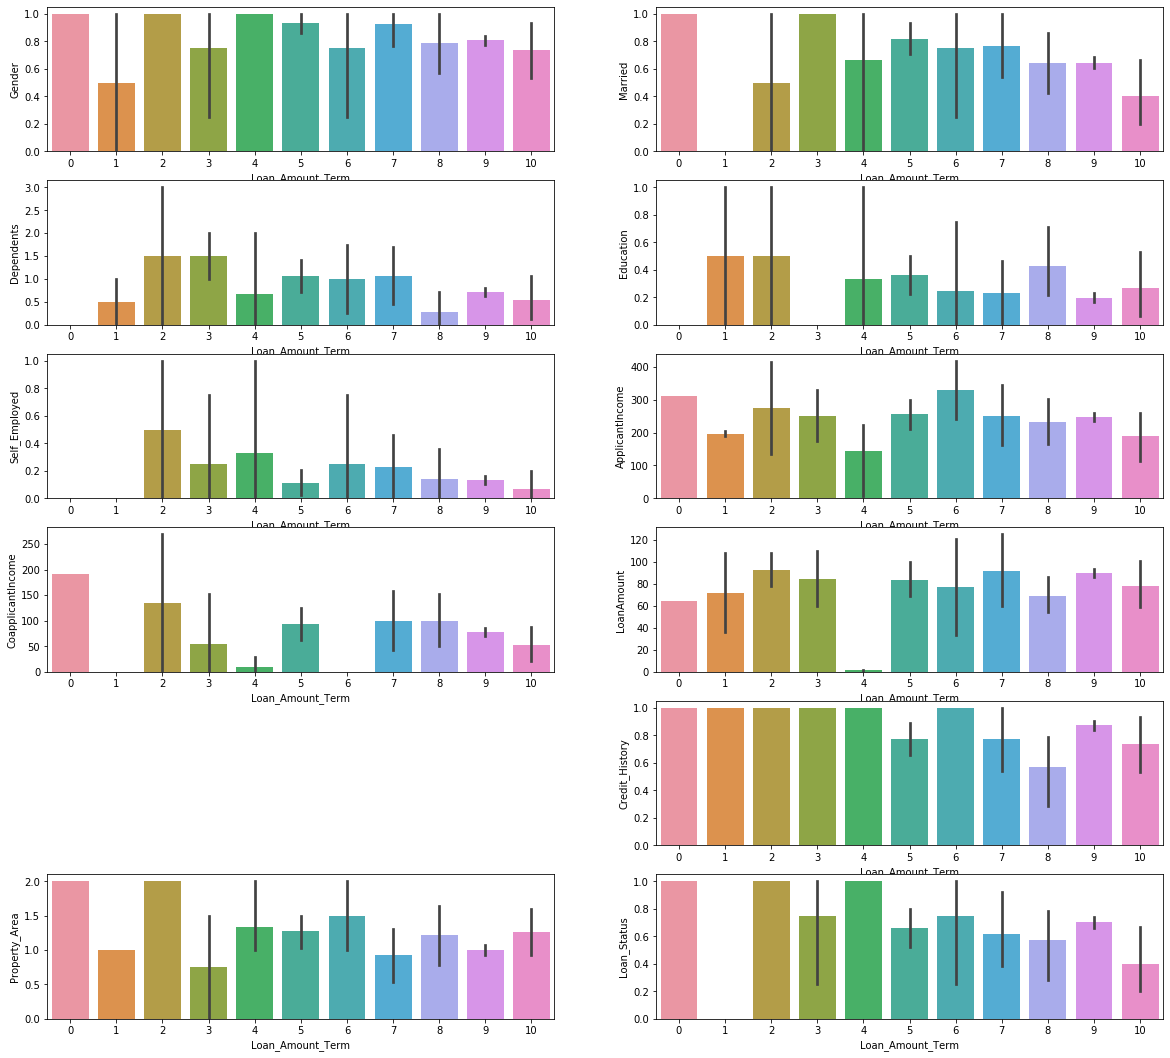

In [19]:
# creating bar plot of colums with respect to Loan_Amount_Term to check distribution among Loan_Amount_Term

count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Loan_Amount_Term':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Loan_Amount_Term', y=column, data=flp1)

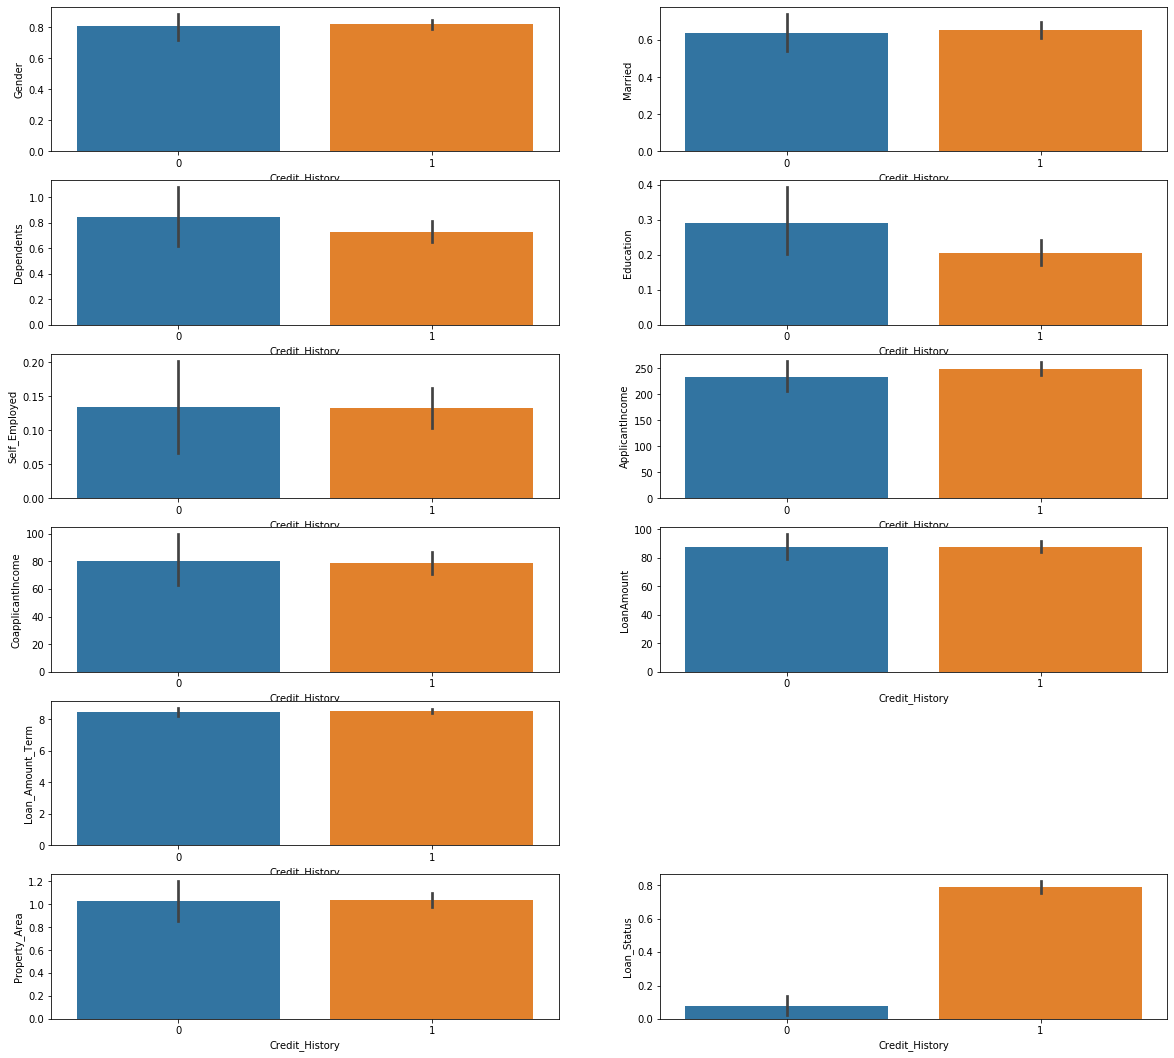

In [20]:
# creating bar plot of colums with respect to Credit_History to check distribution among Credit_History
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Credit_History':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Credit_History', y=column, data=flp1)

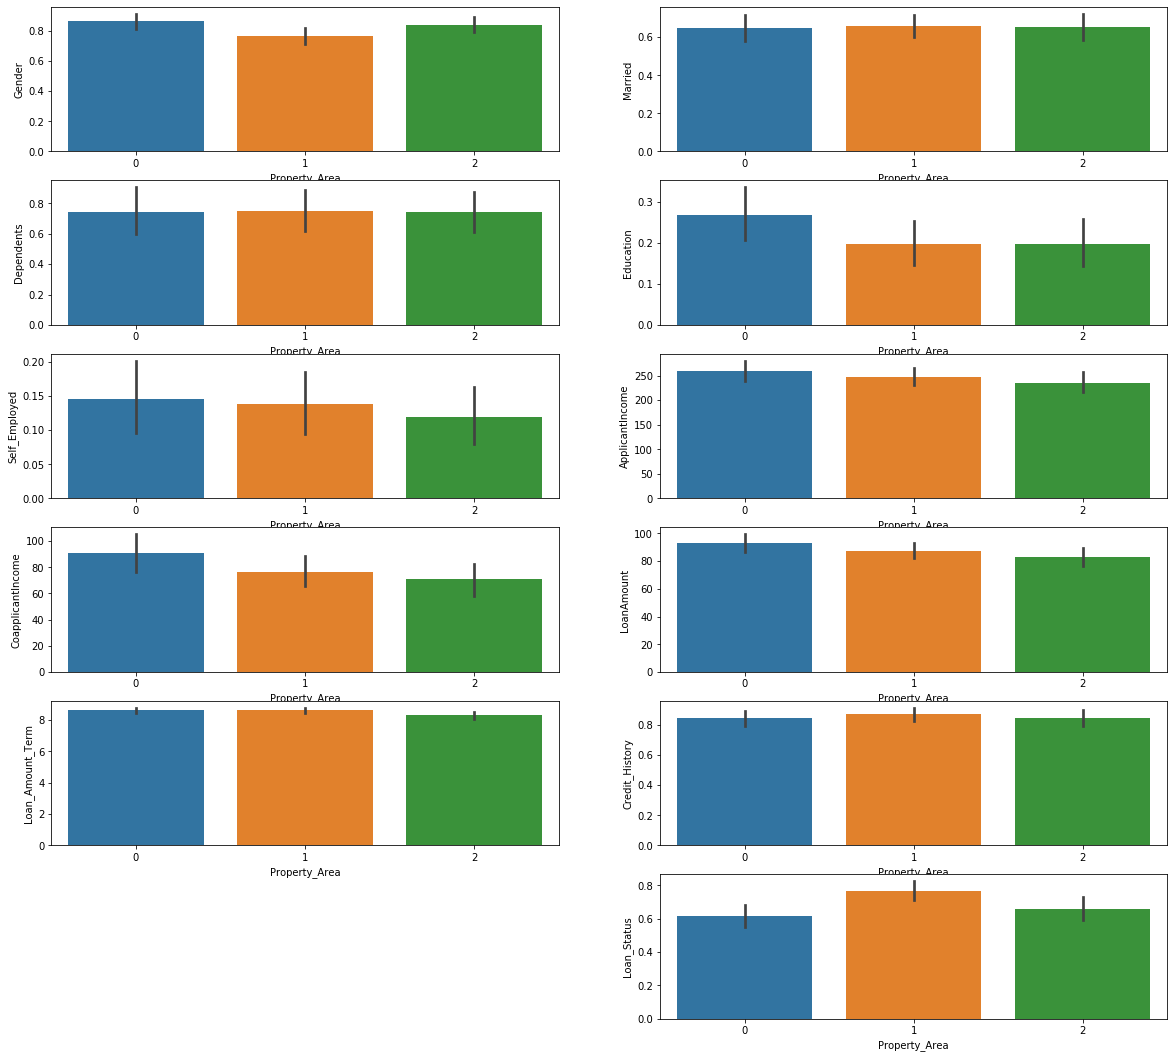

In [21]:
# creating bar plot of colums with respect to Property_Area to check distribution among Property_Area
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Property_Area':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Property_Area', y=column, data=flp1)

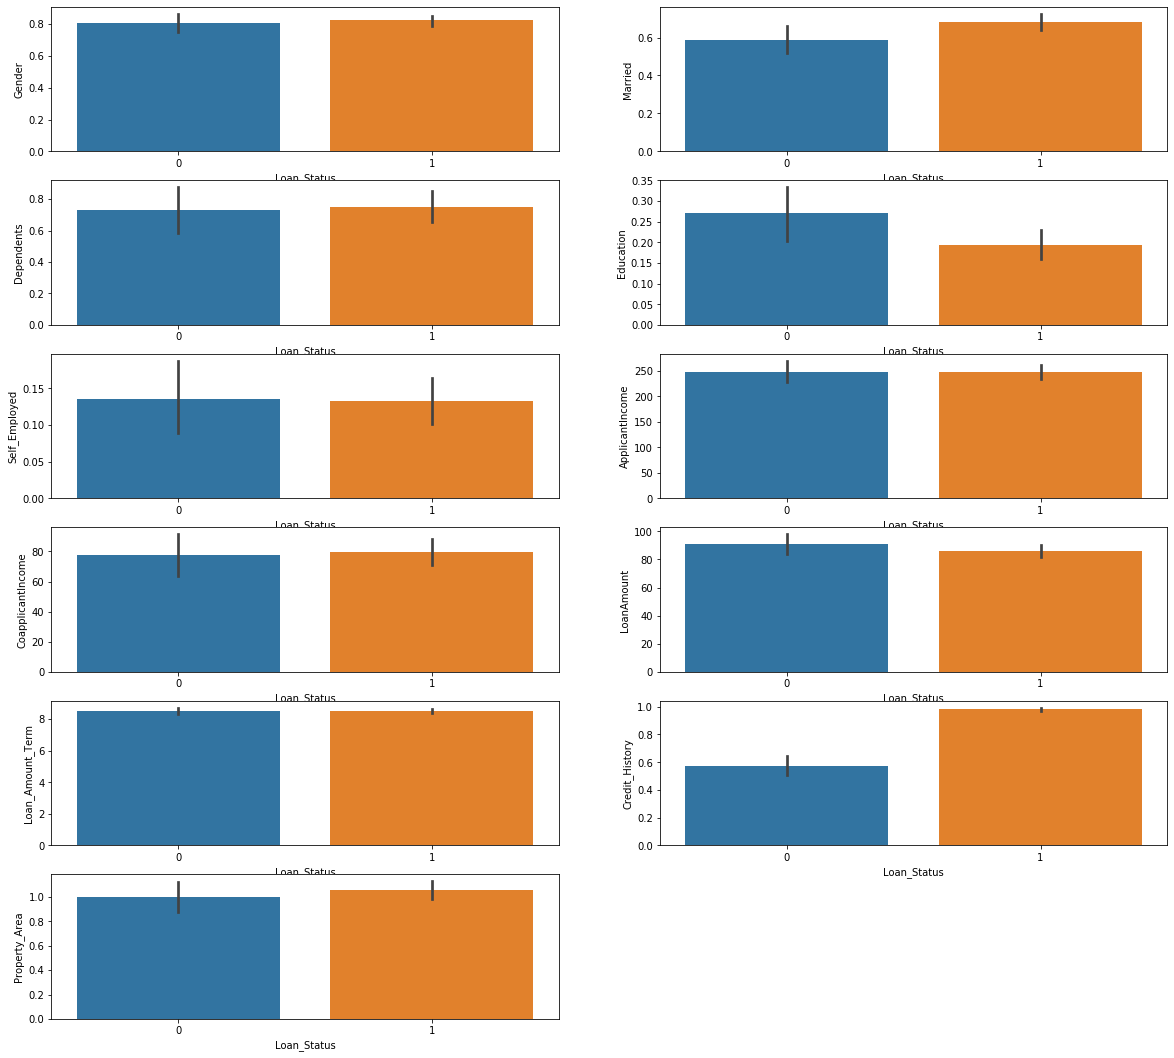

In [22]:
# creating bar plot of colums with respect to Loan_Status to check distribution among Loan_Status
count=flp1[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
           'Loan_Status']]
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(flp1.columns):
    if column == 'Loan_Status':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Loan_Status', y=column, data=flp1)

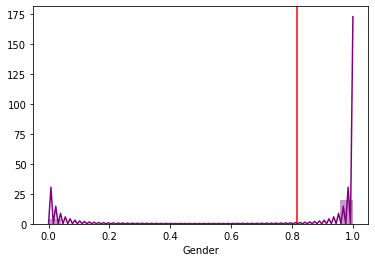

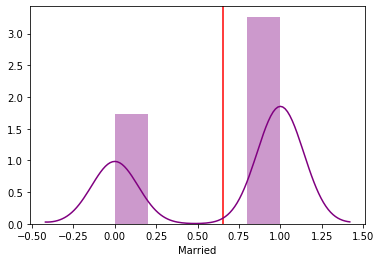

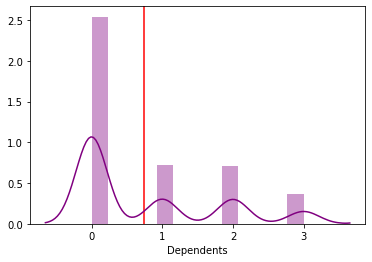

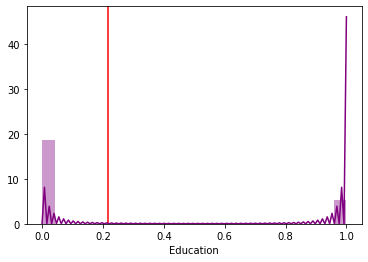

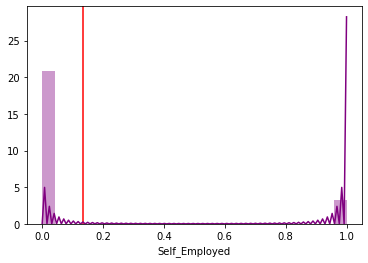

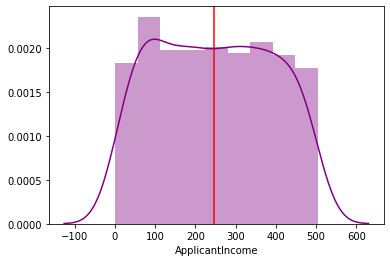

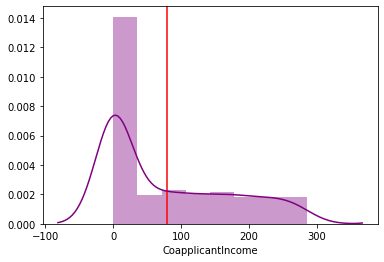

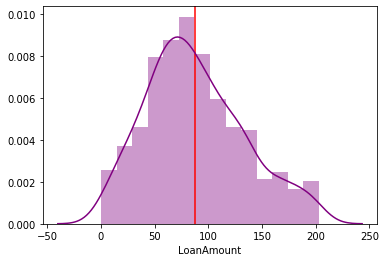

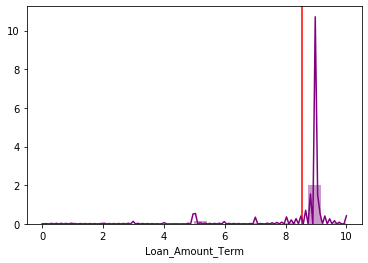

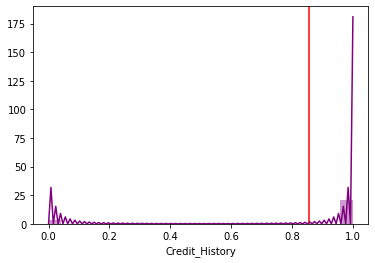

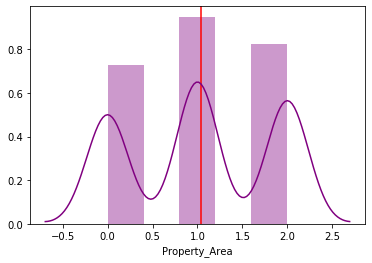

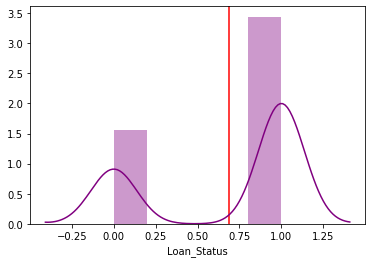

In [23]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(flp1):
    plt.figure(i)
    plt.axvline(flp1[col].mean(),color = 'r')
    sns.distplot(flp1[col],color='purple')

Gender                  AxesSubplot(0.125,0.772143;0.227941x0.107857)
Married              AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Dependents           AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Education               AxesSubplot(0.125,0.642714;0.227941x0.107857)
Self_Employed        AxesSubplot(0.398529,0.642714;0.227941x0.107857)
ApplicantIncome      AxesSubplot(0.672059,0.642714;0.227941x0.107857)
CoapplicantIncome       AxesSubplot(0.125,0.513286;0.227941x0.107857)
LoanAmount           AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Loan_Amount_Term     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Credit_History          AxesSubplot(0.125,0.383857;0.227941x0.107857)
Property_Area        AxesSubplot(0.398529,0.383857;0.227941x0.107857)
Loan_Status          AxesSubplot(0.672059,0.383857;0.227941x0.107857)
dtype: object

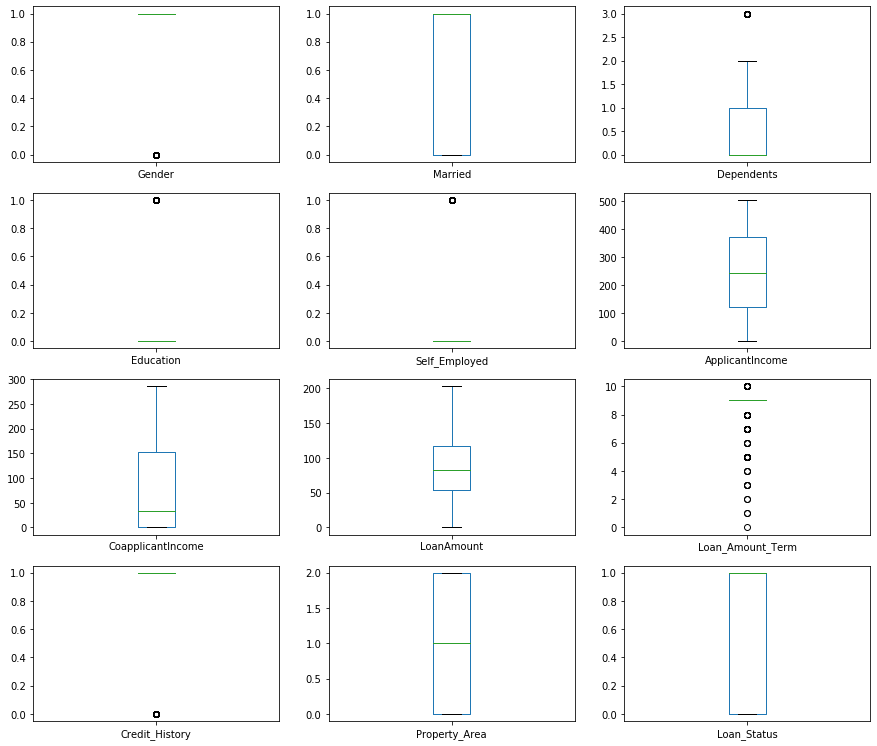

In [24]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
flp1.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

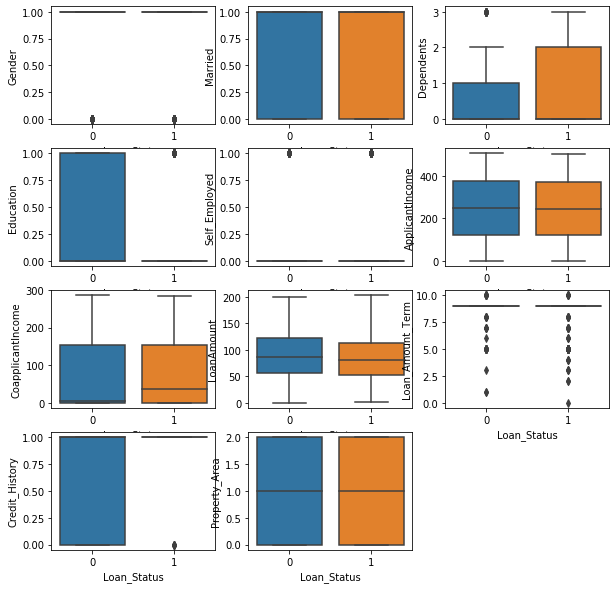

In [25]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires Loan_Status wise
figure(num=None, figsize=(10,10))
for column_index, column in enumerate(flp1.columns):
    if column == 'Loan_Status':
        continue
    plt.subplot(4, 3, column_index+1)
    sns.boxplot(x='Loan_Status', y=column, data=flp1)

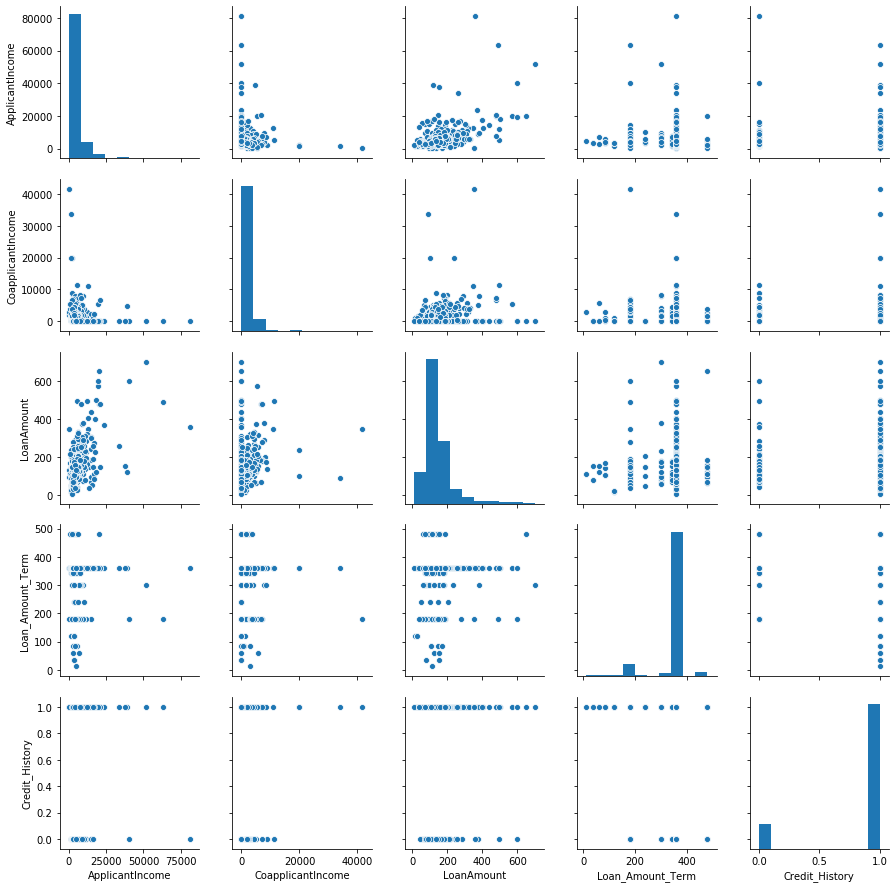

In [26]:
# pair plot to see the scatter of data
sns.pairplot(flp)

###### Manipulating data before bulding the model

In [27]:
#Label Encoding Loan_Status variable
le=LabelEncoder()
flp['Loan_Status']=le.fit_transform(flp['Loan_Status'])
flp.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
440,Male,No,0,Graduate,No,3660,5064.0,187.0,360.0,1.0,Semiurban,1
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,0
71,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,1
401,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,Rural,0
602,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1


In [28]:
#using get_dummies to convert the vales in numeric form
flp=pd.get_dummies(flp)
flp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [29]:
#checking skewness
Index=flp[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
print('\x1b[1;31m'+'Skewness in train data\n\n'+'\x1b[0m',Index.skew(),'\n\n')

Skewness in train data

 ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
dtype: float64 




In [30]:
#removing skewness
for col in Index.columns:
    if Index.skew().loc[col]>0.55:
        flp[col]=np.power(flp[col],1/10)

for col in Index.columns:
    if Index.skew().loc[col]<-0.55:
        flp[col]=np.power(flp[col],3)
flp.skew()

ApplicantIncome            0.977793
CoapplicantIncome         -0.192107
LoanAmount                 0.115182
Loan_Amount_Term           0.385161
Credit_History            -2.021971
Loan_Status               -0.809998
Gender_Female              1.648795
Gender_Male               -1.648795
Married_No                 0.644850
Married_Yes               -0.644850
Dependents_0              -0.351399
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Education_Graduate        -1.367622
Education_Not Graduate     1.367622
Self_Employed_No          -2.159796
Self_Employed_Yes          2.159796
Property_Area_Rural        0.919670
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

In [31]:
# dividing dataset into input values 'x' and output value 'y'
x = flp.drop(['Loan_Status'],axis=1)
print('x dataset\n',x.head(),'\n')
y=flp['Loan_Status']
print('y datase\n',y.sample(5))
print(x.shape)
print(y.shape)

x dataset
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         2.380719           0.000000    1.646485        46656000.0   
1         2.323352           2.078931    1.624505        46656000.0   
2         2.226959           0.000000    1.520388        46656000.0   
3         2.193878           2.173974    1.614054        46656000.0   
4         2.386795           0.000000    1.640295        46656000.0   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0             1.0              0            1           1            0   
1             1.0              0            1           0            1   
2             1.0              0            1           0            1   
3             1.0              0            1           0            1   
4             1.0              0            1           1            0   

   Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0             1             0             0            

In [32]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

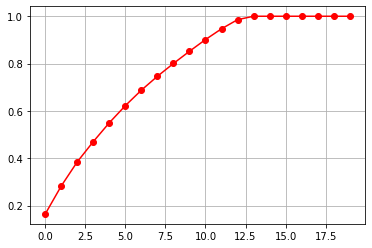

In [33]:
# using pca to find out the variance ratio for dimensionality-reduction
pca=PCA()
train_x1=pca.fit(x)

plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

we will not use pca for dimensionality-reduction since this does'nt have much effect

###### Bulding and comparing multipe classification model, to find out the best model

In [34]:
#creating models array with all the model
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [35]:
# loop to find out the maximum ayuray of all the model in models arrac along the range of random state
Model_array=[]
Random_state=[]
Max_accuracy_array=[]
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [36]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
0,SVC,0.869919,16
1,GaussianNB,0.869919,16
5,GradientBoostingClassifier,0.869919,16
6,LinearDiscriminantAnalysis,0.869919,16
3,LogisticRegression,0.861789,16
2,SGDClassifier,0.845528,13
7,RandomForestClassifier,0.845528,64
4,DecisionTreeClassifier,0.796748,21
8,KNeighborsClassifier,0.796748,16
9,QuadraticDiscriminantAnalysis,0.788618,88


###### Conclusion
On basis of accuracy LinearDiscriminantAnalysis model is performing the best with maximum accuracy score

In [37]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='accuracy')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [38]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
6,LinearDiscriminantAnalysis,0.807985,0.038146
0,SVC,0.807959,0.038249
3,LogisticRegression,0.803094,0.038595
1,GaussianNB,0.790111,0.042915
5,GradientBoostingClassifier,0.786885,0.051091
7,RandomForestClassifier,0.765627,0.039755
2,SGDClassifier,0.728265,0.074729
4,DecisionTreeClassifier,0.715045,0.054915
8,KNeighborsClassifier,0.713273,0.032401
9,QuadraticDiscriminantAnalysis,0.628741,0.118194


###### Conclusion
On basis of Crossval score for accuracy LinearDiscriminantAnalysis model is performing the best with maximum Crossval score

###### On basis of our compression of accuracy and Cross val score i choose LinearDiscriminantAnalysis model since it performing best on given data

In [39]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
#using grid search to improve model..
kfoldr =KFold(n_splits=10,random_state=5)
param_grid={'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['rbf'],'probability':[True,False]}
mod=SVC()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='accuracy',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [41]:
grid_result.best_score_

0.8094462540716613

In [42]:
grid_result.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Model score is: 0.7942973523421588 

Accuracy score of model is :  0.8699186991869918 

The mean of cross_val_score for themodel is: 0.8095980962453726 

Precision score of model is : 0.8415841584158416 

Recall score of model is : 1.0 

Log loss score of model is : 4.4929529746134484 

F1_score score of model is : 0.913978494623656 

Confusion matrix for the model is : 
 [[22 16]
 [ 0 85]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73        38
           1       0.84      1.00      0.91        85

    accuracy                           0.87       123
   macro avg       0.92      0.79      0.82       123
weighted avg       0.89      0.87      0.86       123
 



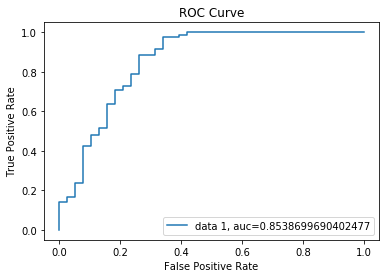

In [43]:
#final classification model
svc= SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=16,stratify=y,shuffle=True)
kfoldr =KFold(n_splits=10,random_state=5)

svc.fit(train_x,train_y)
pred=svc.predict(test_x)
predict_proba = svc.predict_proba(test_x)[::,1]
score=cross_val_score(svc,x,y,cv=kfoldr,scoring='accuracy').mean()

print('Model score is:',svc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for themodel is:',score,'\n')

print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')

print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 12 Fraud  Loan Prediction.csv')

In [45]:
# saving the model using pickle.
joblib.dump(svc,'svc_Project 12 Fraud  Loan Prediction.pkl')

['svc_Project 12 Fraud  Loan Prediction.pkl']